In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Harsh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('Indian_Kids_Screen_Time.csv')

In [3]:
data.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
data.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [5]:
(3218/9712)*100

33.134266886326195

In [6]:
data['Primary_Device'].unique()

array(['Smartphone', 'Laptop', 'TV', 'Tablet'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
data['Primary_Device'] = le.fit_transform(data['Primary_Device'])
data['Gender'] = le.fit_transform(data['Gender'])

In [9]:
data

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,1,3.99,1,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,0,4.61,0,True,0.30,Poor Sleep,Urban
2,18,0,3.73,2,True,0.32,Poor Sleep,Urban
3,15,0,1.21,0,False,0.39,NaN,Urban
4,12,0,5.89,1,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,1,3.26,1,True,0.44,Poor Sleep,Urban
9708,17,0,4.43,1,True,0.40,Poor Sleep,Rural
9709,16,1,5.62,1,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,1,5.60,2,True,0.43,Poor Sleep,Urban


In [10]:
data['Health_Impacts'].unique()

array(['Poor Sleep, Eye Strain', 'Poor Sleep', nan, 'Poor Sleep, Anxiety',
       'Poor Sleep, Obesity Risk', 'Eye Strain', 'Obesity Risk',
       'Anxiety', 'Poor Sleep, Anxiety, Obesity Risk',
       'Eye Strain, Obesity Risk', 'Eye Strain, Anxiety, Obesity Risk',
       'Anxiety, Obesity Risk', 'Poor Sleep, Eye Strain, Obesity Risk',
       'Poor Sleep, Eye Strain, Anxiety',
       'Poor Sleep, Eye Strain, Anxiety, Obesity Risk',
       'Eye Strain, Anxiety'], dtype=object)

In [11]:
data['Urban_or_Rural'] = le.fit_transform(data['Urban_or_Rural'])
data['Exceeded_Recommended_Limit'] = le.fit_transform(data['Exceeded_Recommended_Limit'])

In [12]:
data

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,1,3.99,1,1,0.42,"Poor Sleep, Eye Strain",1
1,11,0,4.61,0,1,0.30,Poor Sleep,1
2,18,0,3.73,2,1,0.32,Poor Sleep,1
3,15,0,1.21,0,0,0.39,NaN,1
4,12,0,5.89,1,1,0.49,"Poor Sleep, Anxiety",1
...,...,...,...,...,...,...,...,...
9707,17,1,3.26,1,1,0.44,Poor Sleep,1
9708,17,0,4.43,1,1,0.40,Poor Sleep,0
9709,16,1,5.62,1,1,0.39,"Poor Sleep, Eye Strain, Anxiety",0
9710,17,1,5.60,2,1,0.43,Poor Sleep,1


In [13]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Age
17    919
8     912
13    910
14    896
9     885
10    877
16    876
12    867
11    866
15    864
18    840
Name: count, dtype: int64
********************
Gender
1    4942
0    4770
Name: count, dtype: int64
********************
Avg_Daily_Screen_Time_hr
0.00     226
4.93      41
4.03      39
4.96      39
4.32      39
        ... 
9.68       1
8.22       1
8.06       1
10.07      1
7.47       1
Name: count, Length: 899, dtype: int64
********************
Primary_Device
1    4568
2    2487
0    1433
3    1224
Name: count, dtype: int64
********************
Exceeded_Recommended_Limit
1    8301
0    1411
Name: count, dtype: int64
********************
Educational_to_Recreational_Ratio
0.45    519
0.41    493
0.47    490
0.46    489
0.44    485
0.43    465
0.49    465
0.42    459
0.40    434
0.48    427
0.37    391
0.36    383
0.39    372
0.31    347
0.32    346
0.38    344
0.35    342
0.33    341
0.34    339
0.50    313
0.30    184
0.54    146
0.59    145
0.55    140
0.53    138
0.56   

In [14]:
data[(data['Avg_Daily_Screen_Time_hr'] < 3) & (data['Health_Impacts'].isna())& (data['Exceeded_Recommended_Limit']==0)]

# less than 3 because after exceeding this limit data goes down.

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
3,15,0,1.21,0,0,0.39,NaN,1
6,17,1,2.97,2,0,0.48,NaN,0
19,9,0,0.00,2,0,0.42,NaN,1
22,9,0,1.63,3,0,0.58,NaN,1
26,13,0,1.85,1,0,0.49,NaN,1
...,...,...,...,...,...,...,...,...
9667,8,0,0.89,3,0,0.52,NaN,1
9669,11,1,2.50,1,0,0.31,NaN,0
9676,18,1,0.86,1,0,0.32,NaN,1
9689,8,1,1.90,3,0,0.57,NaN,1


In [15]:
data.loc[(data['Avg_Daily_Screen_Time_hr'] < 3) &(data['Health_Impacts'].isna()) &(data['Exceeded_Recommended_Limit'] == 0),'Health_Impacts'] = 'No Impact'

In [16]:
df= data[(data['Avg_Daily_Screen_Time_hr'] == 0)]

In [17]:
df['Age'].value_counts()

# now see that age of child is minor, I Think parents control their electronic devices. 

Age
10    89
9     71
8     65
17     1
Name: count, dtype: int64

In [18]:
data.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       1814
Urban_or_Rural                          0
dtype: int64

In [19]:
data['Health_Impacts'].value_counts()

Health_Impacts
Poor Sleep                                       2268
No Impact                                        1404
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [20]:
prod = data['Health_Impacts'].value_counts(normalize = True)

In [21]:
data.loc[data['Health_Impacts'].isna(),'Health_Impacts']=np.random.choice(prod.index,size =data['Health_Impacts'].isna().sum(),p= prod.values)

# fill remaining values on basis of percentage of data

In [22]:
data.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [23]:
data['Health_Impacts'].value_counts() # filling data

Health_Impacts
Poor Sleep                                       2802
No Impact                                        1716
Poor Sleep, Eye Strain                           1238
Eye Strain                                        780
Poor Sleep, Anxiety                               730
Poor Sleep, Obesity Risk                          548
Anxiety                                           478
Poor Sleep, Eye Strain, Anxiety                   322
Obesity Risk                                      308
Poor Sleep, Eye Strain, Obesity Risk              232
Eye Strain, Anxiety                               169
Eye Strain, Obesity Risk                          127
Poor Sleep, Anxiety, Obesity Risk                  95
Anxiety, Obesity Risk                              80
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      45
Eye Strain, Anxiety, Obesity Risk                  42
Name: count, dtype: int64

In [24]:
data['Gender'].replace(1,'M',inplace = True)
data['Gender'].replace(0,'F',inplace = True)

data['Urban_or_Rural'].replace(1,'U',inplace = True)
data['Urban_or_Rural'].replace(0,'R',inplace= True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_31228\614164580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(1,'M',inplace = True)


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

# The MultiLabelBinarizer is a useful tool in Python's scikit-learn library for transforming a list of sets or lists of labels 
# into a binary matrix. This is particularly useful for multi-label classification problems where each instance can belong to 
# multiple classes.

In [25]:
mlb = MultiLabelBinarizer()

In [26]:
encoded = mlb.fit_transform(data['Health_Impacts'].str.split(', '))

In [27]:
df_encoded = pd.DataFrame(encoded, columns=mlb.classes_)

In [28]:
data = pd.concat([data, df_encoded], axis=1)

In [29]:
data

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Anxiety,Eye Strain,No Impact,Obesity Risk,Poor Sleep
0,14,1,3.99,1,1,0.42,"Poor Sleep, Eye Strain",1,0,1,0,0,1
1,11,0,4.61,0,1,0.30,Poor Sleep,1,0,0,0,0,1
2,18,0,3.73,2,1,0.32,Poor Sleep,1,0,0,0,0,1
3,15,0,1.21,0,0,0.39,No Impact,1,0,0,1,0,0
4,12,0,5.89,1,1,0.49,"Poor Sleep, Anxiety",1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,1,3.26,1,1,0.44,Poor Sleep,1,0,0,0,0,1
9708,17,0,4.43,1,1,0.40,Poor Sleep,0,0,0,0,0,1
9709,16,1,5.62,1,1,0.39,"Poor Sleep, Eye Strain, Anxiety",0,1,1,0,0,1
9710,17,1,5.60,2,1,0.43,Poor Sleep,1,0,0,0,0,1


In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
one = OneHotEncoder(sparse_output=False)
encoded = one.fit_transform(data[['Gender','Urban_or_Rural']])

In [32]:
encoded_df = pd.DataFrame(encoded, columns=one.get_feature_names_out(['Gender','Urban_or_Rural']))

In [33]:
data = pd.concat([data, encoded_df], axis=1)

In [34]:
data

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Anxiety,Eye Strain,No Impact,Obesity Risk,Poor Sleep,Gender_0,Gender_1,Urban_or_Rural_0,Urban_or_Rural_1
0,14,1,3.99,1,1,0.42,"Poor Sleep, Eye Strain",1,0,1,0,0,1,0.0,1.0,0.0,1.0
1,11,0,4.61,0,1,0.30,Poor Sleep,1,0,0,0,0,1,1.0,0.0,0.0,1.0
2,18,0,3.73,2,1,0.32,Poor Sleep,1,0,0,0,0,1,1.0,0.0,0.0,1.0
3,15,0,1.21,0,0,0.39,No Impact,1,0,0,1,0,0,1.0,0.0,0.0,1.0
4,12,0,5.89,1,1,0.49,"Poor Sleep, Anxiety",1,1,0,0,0,1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,1,3.26,1,1,0.44,Poor Sleep,1,0,0,0,0,1,0.0,1.0,0.0,1.0
9708,17,0,4.43,1,1,0.40,Poor Sleep,0,0,0,0,0,1,1.0,0.0,1.0,0.0
9709,16,1,5.62,1,1,0.39,"Poor Sleep, Eye Strain, Anxiety",0,1,1,0,0,1,0.0,1.0,1.0,0.0
9710,17,1,5.60,2,1,0.43,Poor Sleep,1,0,0,0,0,1,0.0,1.0,0.0,1.0


In [35]:
data.drop(columns =['Health_Impacts','Gender','Urban_or_Rural'],inplace = True)

In [36]:
data.head(5)

,Age,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Anxiety,Eye Strain,No Impact,Obesity Risk,Poor Sleep,Gender_0,Gender_1,Urban_or_Rural_0,Urban_or_Rural_1
0,14,3.99,1,1,0.42,0,1,0,0,1,0.0,1.0,0.0,1.0
1,11,4.61,0,1,0.30,0,0,0,0,1,1.0,0.0,0.0,1.0
2,18,3.73,2,1,0.32,0,0,0,0,1,1.0,0.0,0.0,1.0
3,15,1.21,0,0,0.39,0,0,1,0,0,1.0,0.0,0.0,1.0
4,12,5.89,1,1,0.49,1,0,0,0,1,1.0,0.0,0.0,1.0


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
data[['Age','Avg_Daily_Screen_Time_hr']]= scaler.fit_transform(data[['Age','Avg_Daily_Screen_Time_hr']])

In [40]:
data.head(10)

# data is ready for Machine Learning

,Age,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Anxiety,Eye Strain,No Impact,Obesity Risk,Poor Sleep,Gender_0,Gender_1,Urban_or_Rural_0,Urban_or_Rural_1
0,0.6,0.287257,1,1,0.42,0,1,0,0,1,0.0,1.0,0.0,1.0
1,0.3,0.331893,0,1,0.30,0,0,0,0,1,1.0,0.0,0.0,1.0
2,1.0,0.268539,2,1,0.32,0,0,0,0,1,1.0,0.0,0.0,1.0
3,0.7,0.087113,0,0,0.39,0,0,1,0,0,1.0,0.0,0.0,1.0
4,0.4,0.424046,1,1,0.49,1,0,0,0,1,1.0,0.0,0.0,1.0
5,0.6,0.351332,1,1,0.44,0,0,0,0,1,1.0,0.0,0.0,1.0
6,0.9,0.213823,2,0,0.48,0,0,1,0,0,0.0,1.0,1.0,0.0
7,0.2,0.197264,2,1,0.54,0,0,0,0,1,0.0,1.0,0.0,1.0
8,0.6,0.331893,0,1,0.36,1,0,0,0,1,0.0,1.0,1.0,0.0
9,1.0,0.233261,3,1,0.48,0,0,0,1,1,0.0,1.0,0.0,1.0


In [44]:
data = data.rename(columns={'Gender_0': 'Female', 'Gender_1': 'Male'})
data = data.rename(columns={'Urban_or_Rural_0':'Rural','Urban_or_Rural_1':'Urban'})

In [49]:
data = data.rename(columns={'Avg_Daily_Screen_Time_hr':'Screen_time','Exceeded_Recommended_Limit':'Exceed_limit'})
data = data.rename(columns={'Educational_to_Recreational_Ratio':'Education_uses_Ratio'})

In [50]:
data

# data is ready for Machine Learning Algorithms

,Age,Screen_time,Primary_Device,Exceed_limit,Education_uses_Ratio,Anxiety,Eye Strain,No Impact,Obesity Risk,Poor Sleep,Female,Male,Rural,Urban
0,0.6,0.287257,1,1,0.42,0,1,0,0,1,0.0,1.0,0.0,1.0
1,0.3,0.331893,0,1,0.30,0,0,0,0,1,1.0,0.0,0.0,1.0
2,1.0,0.268539,2,1,0.32,0,0,0,0,1,1.0,0.0,0.0,1.0
3,0.7,0.087113,0,0,0.39,0,0,1,0,0,1.0,0.0,0.0,1.0
4,0.4,0.424046,1,1,0.49,1,0,0,0,1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,0.9,0.234701,1,1,0.44,0,0,0,0,1,0.0,1.0,0.0,1.0
9708,0.9,0.318934,1,1,0.40,0,0,0,0,1,1.0,0.0,1.0,0.0
9709,0.8,0.404608,1,1,0.39,1,1,0,0,1,0.0,1.0,1.0,0.0
9710,0.9,0.403168,2,1,0.43,0,0,0,0,1,0.0,1.0,0.0,1.0


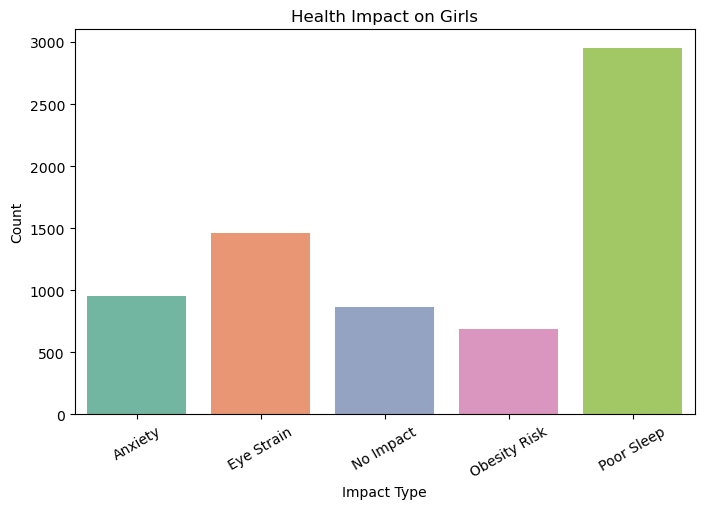

In [46]:
impact_cols = ['Anxiety','Eye Strain','No Impact','Obesity Risk','Poor Sleep']

girls = data[data['Female'] == 1]

summary = girls[impact_cols].sum().reset_index()
summary.columns = ['Impact','Count']

plt.figure(figsize=(8,5))

sns.barplot(data=summary, x='Impact',y='Count',palette='Set2')

plt.title("Health Impact on Girls")
plt.xlabel("Impact Type")
plt.ylabel("Count")
plt.xticks(rotation=30)

plt.show()

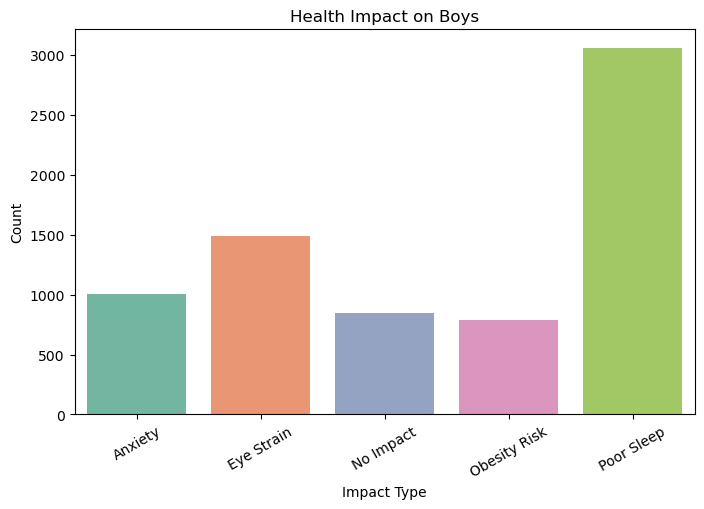

In [47]:
impact_cols = ['Anxiety','Eye Strain','No Impact','Obesity Risk','Poor Sleep']

Boys = data[data['Male'] == 1]

summary = Boys[impact_cols].sum().reset_index()
summary.columns = ['Impact','Count']

plt.figure(figsize=(8,5))

sns.barplot(data=summary,x='Impact',y='Count',palette='Set2')

plt.title("Health Impact on Boys")
plt.xlabel("Impact Type")
plt.ylabel("Count")
plt.xticks(rotation=30)

plt.show()

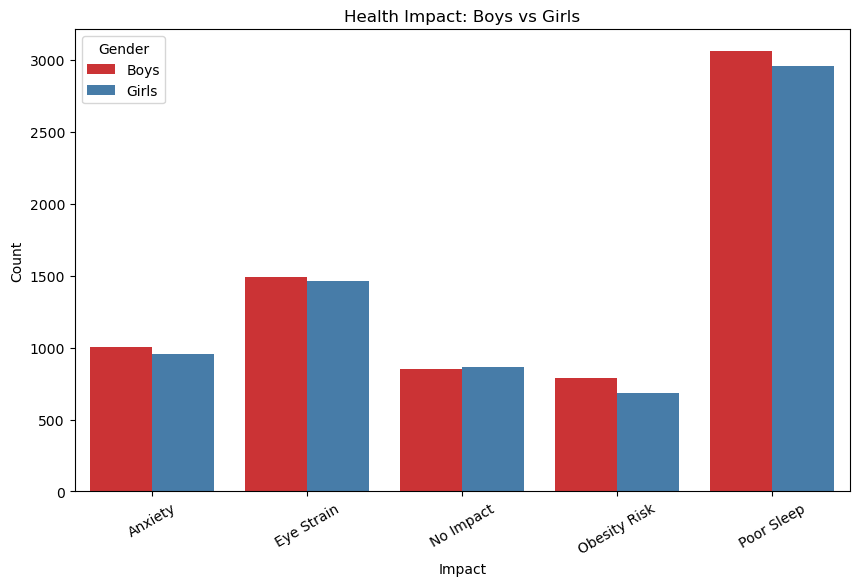

In [48]:
# graph using ChatGPT

impact_cols = ['Anxiety','Eye Strain','No Impact','Obesity Risk','Poor Sleep']

summary = data.groupby('Female')[impact_cols].sum()
summary.index = ['Boys','Girls']

summary = summary.T.reset_index().melt(id_vars='index')
summary.columns = ['Impact','Gender','Count']

plt.figure(figsize=(10,6))

sns.barplot(data=summary,x='Impact',y='Count',hue='Gender',palette='Set1')

plt.title("Health Impact: Boys vs Girls")
plt.xticks(rotation=30)

plt.show()